# Image Classification with DNN

## DATASETS:
(a) Carbonic Anhydrase II (ChEMBL205), a protein lyase,  
(b) Cyclin-dependent kinase 2 (CHEMBL301), a protein kinase,  
(c) ether-a-go-go-related gene potassium channel 1 (HERG) (CHEMBL240), a voltage-gated ion channel,  
(d) Dopamine D4 receptor (CHEMBL219), a monoamine GPCR,  
(e) Coagulation factor X (CHEMBL244), a serine protease,  
(f) Cannabinoid CB1 receptor (CHEMBL218), a lipid-like GPCR and  
(g) Cytochrome P450 19A1 (CHEMBL1978), a cytochrome P450.  
The activity classes were selected based on data availability and as representatives of therapeutically important target classes or as anti-targets.

In [1]:
!nvidia-smi

Tue Mar 15 14:06:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| 77%   67C    P0    66W / 240W |    440MiB /  8116MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#%%capture
#!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
#!chmod +x Miniconda3-latest-Linux-x86_64.sh
#!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
#!time conda install -q -y -c conda-forge rdkit

In [3]:
# Import
import pandas as pd
import numpy as np
from pathlib import Path

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit import Chem
from rdkit.Chem import AllChem

RDKit WARNING: [14:06:49] Enabling RDKit 2019.09.3 jupyter extensions


In [5]:
dataset = 'CHEMBL205_cl'

In [6]:
path = Path('../dataset/13321_2017_226_MOESM1_ESM/')
df = pd.read_csv(path/f'{dataset}_ecfp_1024.csv')

In [7]:
list(path.iterdir())

[PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL1978_cl_ecfp_1024.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl-data-with-ecfp-activations.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL244_cl_ecfp_512.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL218_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/RdkitDescriptors.py'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl_ecfp_512.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL301_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl_ecfp_1024.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL1978_cl_ecfp_512.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL240_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL301_cl_ecfp_512.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL218_cl_ecfp_1024.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL301_cl_ecfp_1024.cs

In [8]:
DATA = path/'mol_images'

In [9]:
IMAGES = DATA/dataset

# Create train validation split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_valid = train_test_split(df.index, test_size=0.2, random_state=666, stratify=df['Activity'])
df.loc[x_train, 'is_valid']=False
df.loc[x_valid, 'is_valid']=True

In [12]:
df.is_valid.value_counts()

False    14352
True      3589
Name: is_valid, dtype: int64

# Create dataloader

In [13]:
from fastai.vision.all import *

In [14]:
df['Image'] = df['CID'] + '.png'
df.head()

,CID,SMILES,ECFP4_1,ECFP4_2,ECFP4_3,ECFP4_4,ECFP4_5,ECFP4_6,ECFP4_7,ECFP4_8,...,ECFP4_1018,ECFP4_1019,ECFP4_1020,ECFP4_1021,ECFP4_1022,ECFP4_1023,ECFP4_1024,Activity,is_valid,Image
0,CHEMBL188002,S(=O)(=O)(N)c1cc(N/C(/S)=N\c2cc(C(=O)[O-])c(cc2)C=2c3c(OC4=CC(=O)C=CC=24)cc(O)cc3)ccc1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,False,CHEMBL188002.png
1,CHEMBL364127,Clc1ccc(cc1)C(=O)NC1Cc2cc(S(=O)(=O)N)ccc2C1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,False,CHEMBL364127.png
2,CHEMBL1683469,S(=O)(=O)(N)c1ccc(cc1)CNS(=O)(=O)CC12CCC(CC1=O)C2(C)C,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,False,CHEMBL1683469.png
3,CHEMBL52564,Oc1ccccc1\C=C\C(=O)[O-],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,False,CHEMBL52564.png
4,CHEMBL21427,OB(O)c1ccc(OC)cc1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,False,CHEMBL21427.png


In [15]:
images = df['CID'] + ".png"
images.head()

0     CHEMBL188002.png
1     CHEMBL364127.png
2    CHEMBL1683469.png
3      CHEMBL52564.png
4      CHEMBL21427.png
Name: CID, dtype: object

In [16]:
# No flips, some rotation and zoom. Normalize to imagenet_stats as
# we're using pretrained models.
batch_tfms = [*aug_transforms(mult=1.0, do_flip=False, flip_vert=False, 
               max_rotate=20.0, min_zoom=1.0, max_zoom=1.1, max_lighting=0., 
               max_warp=0., p_affine=0.75, p_lighting=0.75, xtra_tfms=None, 
               size=224, mode='bilinear', 
               pad_mode='border', align_corners=True, 
               batch=False, min_scale=1.0), 
              Normalize.from_stats(*imagenet_stats)]

In [17]:
db = DataBlock(
    blocks = (ImageBlock(), CategoryBlock()), 
    get_x=ColReader('Image', pref=IMAGES),
    get_y=ColReader('Activity'), 
    splitter=ColSplitter('is_valid'),
    item_tfms=None, 
    batch_tfms=None,
    )

In [18]:
def get_df(dataset, random_state=42, test_size=0.2):
    df = pd.read_csv(path/f'{dataset}.csv')
    x_train, x_valid = train_test_split(df.index, test_size=0.2, random_state=random_state, stratify=df['Activity'])
    df.loc[x_train, 'is_valid']=False
    df.loc[x_valid, 'is_valid']=True
    df['Image'] = df['CID'] + '.png'
    return df

In [19]:
def get_df_with_clusters(dataset, n_clusters=100, random_state=42, test_size=0.2):
    df = pd.read_csv(path/f'{dataset}_ECFP_1024_with_{n_clusters}_clusters.csv')
    values = df.Cluster.value_counts(ascending=True)
    values = values[values < 2].index
    for i in list(values):
        df = df.drop(df[df.Cluster == i].index)
    df.reset_index(drop=True, inplace=True)
    x_train, x_valid = train_test_split(df.index, test_size=test_size, random_state=random_state, stratify=df['Cluster'])
    df.loc[x_train, 'is_valid']=False
    df.loc[x_valid, 'is_valid']=True
    df['Image'] = df['Name'] + '.png'
    return df

In [20]:
df = get_df_with_clusters(dataset)
df.head()

,Name,SMILES,Cluster,ECFP4_1,ECFP4_2,ECFP4_3,ECFP4_4,ECFP4_5,ECFP4_6,ECFP4_7,...,ECFP4_1018,ECFP4_1019,ECFP4_1020,ECFP4_1021,ECFP4_1022,ECFP4_1023,ECFP4_1024,Activity,is_valid,Image
0,CHEMBL188002,S(=O)(=O)(N)c1cc(N/C(/S)=N\c2cc(C(=O)[O-])c(cc2)C=2c3c(OC4=CC(=O)C=CC=24)cc(O)cc3)ccc1,28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,False,CHEMBL188002.png
1,CHEMBL364127,Clc1ccc(cc1)C(=O)NC1Cc2cc(S(=O)(=O)N)ccc2C1,28,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,False,CHEMBL364127.png
2,CHEMBL1683469,S(=O)(=O)(N)c1ccc(cc1)CNS(=O)(=O)CC12CCC(CC1=O)C2(C)C,93,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,True,CHEMBL1683469.png
3,CHEMBL52564,Oc1ccccc1\C=C\C(=O)[O-],14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,False,CHEMBL52564.png
4,CHEMBL21427,OB(O)c1ccc(OC)cc1,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,True,CHEMBL21427.png


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17928 entries, 0 to 17927
Columns: 1030 entries, Name to Image
dtypes: int64(1026), object(4)
memory usage: 140.9+ MB


In [22]:
IMAGES = DATA/dataset
IMAGES

Path('../dataset/13321_2017_226_MOESM1_ESM/mol_images/CHEMBL205_cl')

In [23]:
def get_dls(dataset, bs=64, clustering=False, random_state=42):
    IMAGES = DATA/dataset
    if clustering:
        df = get_df_with_clusters(dataset, n_clusters=100)
    else: 
        df = get_df(dataset)
    db = DataBlock(
        blocks = (ImageBlock(), CategoryBlock()), 
        get_x=ColReader('Image', pref=IMAGES),
        get_y=ColReader('Activity'), 
        splitter=ColSplitter('is_valid'),
        item_tfms=None, 
        batch_tfms=None,
        )
    dls = db.dataloaders(df, bs=bs, shuffle_train=True, random_state=42)
    return dls, df

In [24]:
dls, _ = get_dls(dataset, clustering=False)

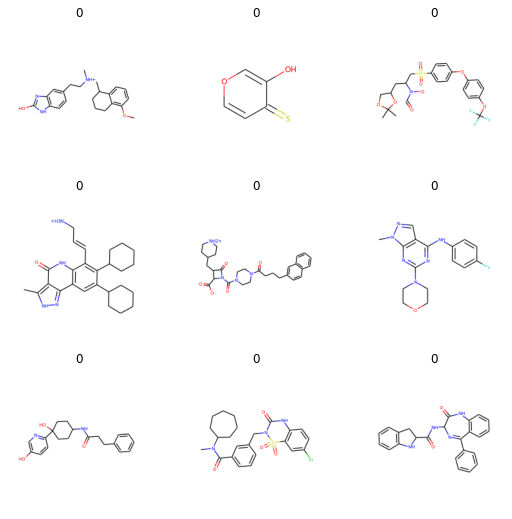

In [25]:
dls.show_batch()

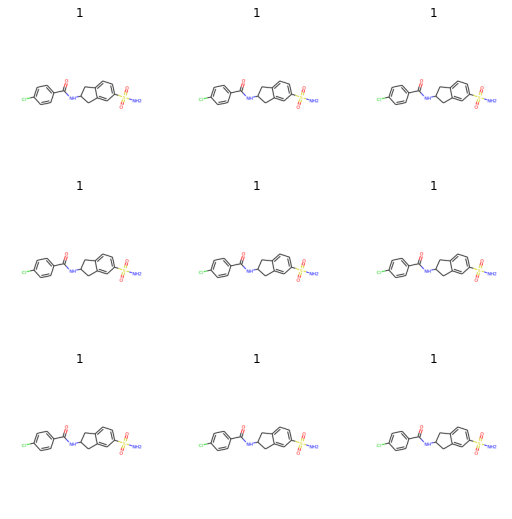

In [26]:
dls.show_batch(unique=True)

# Create class weights

In [27]:
TARGET = 'Activity'

In [28]:
class_count_df = df.groupby(TARGET).count()
class_count_df

,Name,SMILES,Cluster,ECFP4_1,ECFP4_2,ECFP4_3,ECFP4_4,ECFP4_5,ECFP4_6,ECFP4_7,...,ECFP4_1017,ECFP4_1018,ECFP4_1019,ECFP4_1020,ECFP4_1021,ECFP4_1022,ECFP4_1023,ECFP4_1024,is_valid,Image
Activity,,,,,,,,,,,,,,,,,,,,,
0,16298,16298,16298,16298,16298,16298,16298,16298,16298,16298,...,16298,16298,16298,16298,16298,16298,16298,16298,16298,16298
1,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630,...,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630


In [29]:
n_0, n_1 = class_count_df.iloc[0, 0], class_count_df.iloc[1, 0]

In [30]:
w_0 = (n_0 + n_1) / (2.0 * n_0)
w_1 = (n_0 + n_1) / (2.0 * n_1)
w_0, w_1

(0.5500061357221745, 5.499386503067485)

In [31]:
class_weights=torch.FloatTensor([w_0, w_1]).cuda()

In [32]:
loss_func = CrossEntropyLossFlat(weight=class_weights)

In [33]:
def get_loss_func(df):
    TARGET = 'Activity'
    class_count_df = df.groupby(TARGET).count()
    n_0, n_1 = class_count_df.iloc[0, 0], class_count_df.iloc[1, 0]
    w_0 = (n_0 + n_1) / (2.0 * n_0)
    w_1 = (n_0 + n_1) / (2.0 * n_1)
    class_weights=torch.FloatTensor([w_0, w_1]).cuda()
    loss_func = CrossEntropyLossFlat(weight=class_weights)
    return loss_func

In [34]:
loss_func=get_loss_func(df)

# Train CNN model

In [127]:
from sklearn.metrics import auc,roc_auc_score,recall_score,precision_score,f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [36]:
from fastai.callback.hook import *

In [37]:
def train_model(dls, arch=resnet18, loss_func=None, metric = None, epochs=16, wd=None, lr=None):
    
    
    print(f'Architechture: {arch}')
    #print(f'Untrained epochs: freeze_epochs={freeze_epochs}')
    print(f'Trained epochs: epochs={epochs}')
    print(f'Weight decay: wd={wd}')
    if metric == None: 
        learn = cnn_learner(dls, arch=arch, pretrained=True, 
                            wd=wd,
                            loss_func=loss_func,
                            metrics=[accuracy, 
                            F1Score(), 
                            Precision(), 
                            Recall(), 
                            RocAucBinary(), 
                            MatthewsCorrCoef()])
    else: 
        learn = cnn_learner(dls, arch=arch, pretrained=True, 
                                wd=wd,
                                loss_func=loss_func,
                                metrics=[accuracy, 
                                F1Score(), 
                                Precision(), 
                                Recall(), 
                                RocAucBinary(), 
                                MatthewsCorrCoef(), 
                                metric])
    
    if lr == None: 
        print(f'Finding learning rate...')
        lr_min, lr_steep = learn.lr_find(suggestions=True, show_plot=False)
        print(f'Training model with learning rate: {lr_min}')
        lr = lr_min
    else: 
        print(f'Training model with learning rate: {lr}')
    learn.fine_tune(epochs, lr)
    
    return learn

In [40]:
# Train model on resnet18
learn = train_model(dls,loss_func=loss_func, epochs=5, lr=3e-3, wd=0.002)

Architechture: <function resnet18 at 0x7fc8f16cbbf8>
Trained epochs: epochs=5
Weight decay: wd=0.002
Training model with learning rate: 0.003


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.489145,0.420394,0.857063,0.545616,0.383562,0.944785,0.951071,0.546875,00:31


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,time
0,0.261057,0.195233,0.935915,0.712500,0.601266,0.874233,0.971360,0.692875,00:39
1,0.203581,0.160037,0.953190,0.771739,0.692683,0.871166,0.971146,0.752127,00:39
2,0.136211,0.228548,0.934522,0.729574,0.583794,0.972393,0.984858,0.724275,00:39
3,0.076438,0.113704,0.967400,0.837725,0.764557,0.926380,0.978710,0.824459,00:39
4,0.043440,0.120989,0.970744,0.853556,0.782609,0.938650,0.982282,0.841726,00:39


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(k=50)

# Test for metric with cost

In [133]:
cost = [100, 1]

In [134]:
n_0, n_1 = class_count_df.iloc[0, 0], class_count_df.iloc[1, 0]

In [135]:
w_0 = (n_0 + n_1) / (2.0 * n_0)
w_1 = (n_0 + n_1) / (2.0 * n_1)
w_0 = w_0 * cost[0]
w_1 = w_1 * cost[1]
w_0, w_1

(55.000613572217446, 5.499386503067485)

In [136]:
class_weights=torch.FloatTensor([w_0, w_1]).cuda()

In [137]:
decision_loss = nn.CrossEntropyLoss(weight=class_weights)
type(decision_loss)

torch.nn.modules.loss.CrossEntropyLoss

In [138]:
type(F1Score())

fastai.metrics.AccumMetric

In [139]:
# Train model on resnet18
learn = train_model(dls,loss_func=loss_func, metric=decision_loss, epochs=1, lr=3e-3, wd=0.002)

Architechture: <function resnet18 at 0x7fc8f16cbbf8>
Trained epochs: epochs=1
Weight decay: wd=0.002
Training model with learning rate: 0.003


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,None,time
0,0.533949,0.385619,0.854277,0.522374,0.371912,0.877301,0.935774,0.510766,0.389007,00:34


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,None,time
0,0.263074,0.218397,0.935079,0.722949,0.590291,0.932515,0.978973,0.711389,0.221052,00:42


In [140]:
interp = ClassificationInterpretation.from_learner(learn)

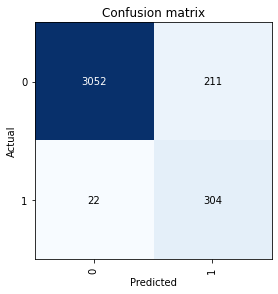

In [141]:
interp.plot_confusion_matrix()

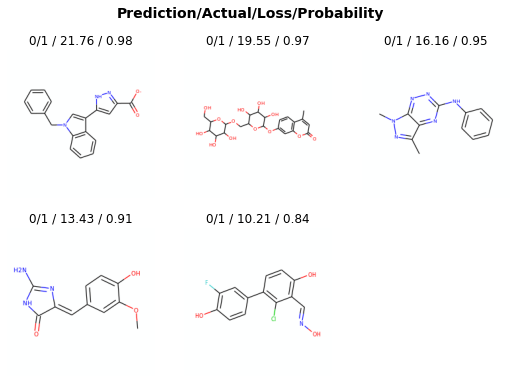

In [142]:
interp.plot_top_losses(k=5)

# Cost-sensitive loss function

In [56]:
import torch
from torch import nn
import torch.nn.functional as F

In [57]:
def cost_sensitive_loss(input, target, M):
    if input.size(0) != target.size(0):
        raise ValueError('Expected input batch_size ({}) to match target batch_size ({}).'
                         .format(input.size(0), target.size(0)))
    device = input.device
    M = M.to(device)
    return (M[target, :]*input.float()).sum(axis=-1)
    # return torch.diag(torch.matmul(input, M[:, target]))

In [58]:
class CostSensitiveLoss(nn.Module):
    def __init__(self,  n_classes, exp=1, normalization='softmax', reduction='mean'):
        super(CostSensitiveLoss, self).__init__()
        if normalization == 'softmax':
            self.normalization = nn.Softmax(dim=1)
        elif normalization == 'sigmoid':
            self.normalization = nn.Sigmoid()
        else:
            self.normalization = None
        self.reduction = reduction
        x = np.abs(np.arange(n_classes, dtype=np.float32))
        M = np.abs((x[:, np.newaxis] - x[np.newaxis, :])) ** exp
        M /= M.max()
        self.M = torch.from_numpy(M)

    def forward(self, logits, target):
        preds = self.normalization(logits)
        loss = cost_sensitive_loss(preds, target, self.M)
        if self.reduction == 'none':
            return loss
        elif self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        else:
            raise ValueError('`reduction` must be one of \'none\', \'mean\', or \'sum\'.')

In [67]:
n_classes = 2

In [73]:
cs_loss = CostSensitiveLoss(n_classes, normalization='sigmoid')

In [74]:
print(cs_loss.M)

tensor([[0., 1.],
        [1., 0.]])


In [75]:
M = np.array([[0,0.5],
              [0.5,0]], dtype=float)
M /= M.max()
M = torch.from_numpy(M)
M = M.to(torch.float32)
cs_loss.M = M


In [76]:
print(cs_loss.M)

tensor([[0., 1.],
        [1., 0.]])


In [79]:
# Train model on resnet18
learn = train_model(dls,loss_func=loss_func, metric=cs_loss, epochs=1, lr=3e-3, wd=0.002)

Architechture: <function resnet18 at 0x7f87f0e39f28>
Trained epochs: epochs=1
Weight decay: wd=0.002
Training model with learning rate: 0.003


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,None,time
0,0.533020,0.366632,0.858735,0.530990,0.380132,0.880368,0.935821,0.519610,0.294106,00:32


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,None,time
0,0.243541,0.207846,0.943160,0.751825,0.622984,0.947853,0.982411,0.741552,0.269236,00:40


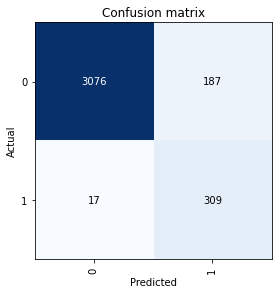

In [80]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

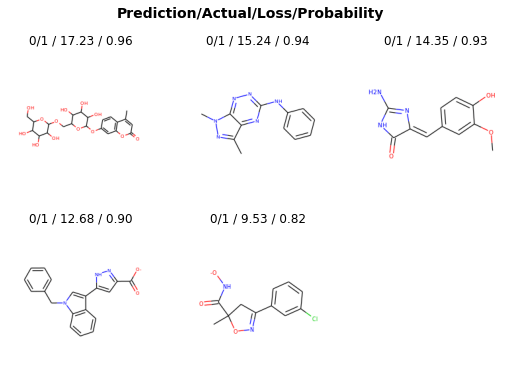

In [81]:
interp.plot_top_losses(k=5)

In [102]:
def cost_sensitive_loss(input, target, M):
    if input.size(0) != target.size(0):
        raise ValueError('Expected input batch_size ({}) to match target batch_size ({}).'
                         .format(input.size(0), target.size(0)))
    device = input.device
    M = M.to(device)
    return (M[target, :]*input.float()).sum(axis=-1)
    #return torch.diag(torch.matmul(input, M[:, target]))

In [97]:
class CostSensitiveRegularizedLoss(nn.Module):
    def __init__(self,  n_classes=5, exp=2, normalization='softmax', reduction='mean', base_loss='ce', lambd=10):
        super(CostSensitiveRegularizedLoss, self).__init__()
        if normalization == 'softmax':
            self.normalization = nn.Softmax(dim=1)
        elif normalization == 'sigmoid':
            self.normalization = nn.Sigmoid()
        else:
            self.normalization = None
        self.reduction = reduction
        x = np.abs(np.arange(n_classes, dtype=np.float32))
        M = np.abs((x[:, np.newaxis] - x[np.newaxis, :])) ** exp
        #
        # M_oph = np.array([
        #                 [1469, 4, 5,  0,  0],
        #                 [58, 62,  5,  0,  0],
        #                 [22, 3, 118,  1,  0],
        #                 [0, 0,   13, 36,  1],
        #                 [0, 0,    0,  1, 15]
        #                 ], dtype=np.float)
        # M_oph = M_oph.T
        # # Normalize M_oph to obtain M_difficulty:
        # M_difficulty = 1-np.divide(M_oph, np.sum(M_oph, axis=1)[:, None])
        # # OPTION 1: average M and M_difficulty:
        # M = 0.5 * M + 0.5 * M_difficulty
        # ################
        # # OPTION 2: replace uninformative entries in M_difficulty by entries of M:
        # # M_difficulty[M_oph == 0] = M[M_oph == 0]
        # # M = M_difficulty

        M /= M.max()
        self.M = torch.from_numpy(M)
        self.lambd = lambd
        self.base_loss = base_loss

        if self.base_loss == 'ce':
            self.base_loss = torch.nn.CrossEntropyLoss(reduction=reduction)
        elif self.base_loss == 'ls':
            self.base_loss = label_smoothing_criterion(distribution='uniform', reduction=reduction)
        elif self.base_loss == 'gls':
            self.base_loss = label_smoothing_criterion(distribution='gaussian', reduction=reduction)
        elif self.base_loss == 'focal_loss':
            kwargs = {"alpha": 0.5, "gamma": 2.0, "reduction": reduction}
            self.base_loss = focal_loss(**kwargs)
        else:
            sys.exit('not a supported base_loss')

    def forward(self, logits, target):
        base_l = self.base_loss(logits, target)
        if self.lambd == 0:
            return self.base_loss(logits, target)
        else:
            preds = self.normalization(logits)
            loss = cost_sensitive_loss(preds, target, self.M)
            if self.reduction == 'none':
                return base_l + self.lambd*loss
            elif self.reduction == 'mean':
                return base_l + self.lambd*loss.mean()
            elif self.reduction == 'sum':
                return base_l + self.lambd*loss.sum()
            else:
                raise ValueError('`reduction` must be one of \'none\', \'mean\', or \'sum\'.')


In [98]:
n_classes = 2 
base_loss = 'ce'
lambd = 10
cs_regularized_criterion = CostSensitiveRegularizedLoss(n_classes=n_classes, base_loss=base_loss, lambd=lambd)

In [99]:
print(cs_regularized_criterion.M)

tensor([[0., 1.],
        [1., 0.]])


In [114]:
# Train model on resnet18
learn = train_model(dls,loss_func=loss_func, metric=cs_regularized_criterion, epochs=1, lr=3e-3, wd=0.002)

Architechture: <function resnet18 at 0x7f87f0e39f28>
Trained epochs: epochs=1
Weight decay: wd=0.002
Training model with learning rate: 0.003


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,None,time
0,0.505812,0.407279,0.857063,0.537421,0.380587,0.914110,0.947126,0.532627,2.221284,00:34


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,roc_auc_score,matthews_corrcoef,None,time
0,0.248849,0.198620,0.941767,0.747889,0.616302,0.950920,0.985061,0.738226,1.267615,00:42


In [120]:
preds, y = learn.get_preds(dl=dls.valid)

In [116]:
preds

tensor([[0.2248, 0.7752],
        [0.0119, 0.9881],
        [0.0043, 0.9957],
        ...,
        [0.9936, 0.0064],
        [0.8841, 0.1159],
        [0.9538, 0.0462]])

In [124]:
pred = preds.argmax(axis=1)
pred

tensor([1, 1, 1,  ..., 0, 0, 0])

In [132]:
cm = confusion_matrix(y, pred)

In [133]:
import seaborn as sns

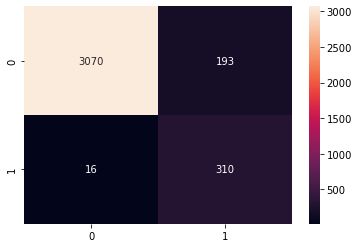

In [134]:
f = sns.heatmap(cm, annot=True, fmt='d')